## Import All Modules and Libraries

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Project Level 3: Data Analysis   

## Overview  
#### In this project, we will perform three key tasks related to restaurant data analysis. Each task will involve data processing, visualization, and insights generation.

## Tasks to Perform  
1  **Restaurant review**  
2  **Votes Analysis**  
3  **Price Range vs Online Delivery and Table booking**  

In [6]:
#Import Data by using read.csv

df = pd.read_csv('Dataset.csv')

In [7]:
# Find the Shape of data( No of rows and colums)

print(df.shape)

(9551, 21)


In [8]:
# Difine the Column Names

print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [9]:
# Difine the Data ( Datatype, Columns, Nullvalues)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Restaurant Review

### (1) Analyze the text reviews to identify the most common positive and negative key words

In [10]:
positive_review = df.loc[df['Aggregate rating'] >=2.5]
print(positive_review)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [23]:
positive_keyword = positive_review['Rating text'].value_counts()
print(positive_keyword)

Rating text
Average      3737
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64


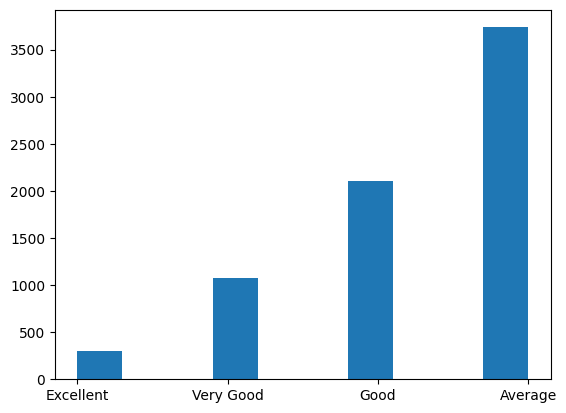

In [18]:
plt.hist(positive_review['Rating text'], label=positive_keyword)
plt.show()

In [20]:
negative_review = df.loc[df['Aggregate rating'] < 2.5]
negative_keyword = negative_review['Rating text'].value_counts()
print(negative_keyword)

Rating text
Not rated    2148
Poor          186
Name: count, dtype: int64


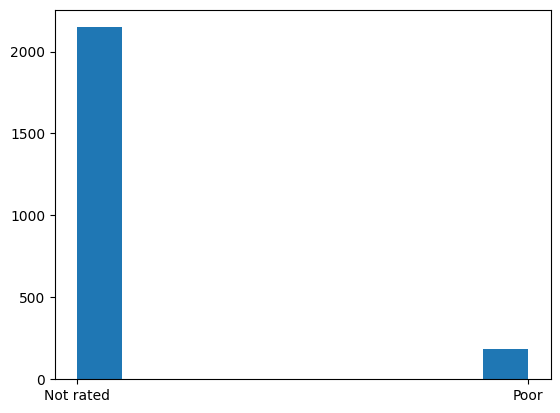

In [22]:
plt.hist(negative_review['Rating text'], label=negative_keyword)
plt.show()

## Task 1: Restaurant Reviews 

### (2) Calculate the average length of reviews and explore if there is a relationship betweenreview length and rating.

### As we don't have a Review Length column or a Review Text column in the Dataset.csv file, I am unable to determine the relationship between review length and rating. However, I have explored all possible ways to identify negative and positive rating keywords along with their counts in the previous tasks.

## Task 2: Votes Analysis

### Identify the restaurant with the highest and lowest number of votes.

In [28]:
highest_voted_restau = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
print('Highest Voted Reataurant:-' , highest_voted_restau.idxmax())

Highest Voted Reataurant:- Barbeque Nation


In [30]:
highest_voted_restau = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
print('Highest Voted Reataurant:-' , highest_voted_restau.idxmin())

Highest Voted Reataurant:- Laxmi Food Corner


## Task 2: Votes Analysis

### (1)Analyze if there is a correlation between the number of votes and the rating of a restaurant

In [35]:
correlation = df[['Votes', 'Aggregate rating']].corr(method='pearson')
print("Correlation between Votes and Rating:\n", correlation)

Correlation between Votes and Rating:
                      Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


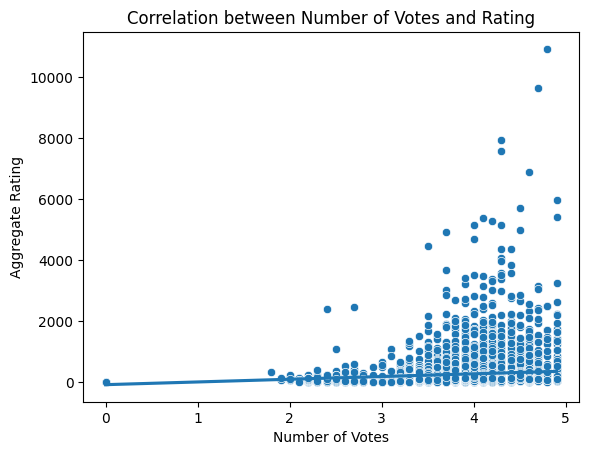

In [44]:
sns.scatterplot(y=df['Votes'], x=df['Aggregate rating'])
sns.regplot(y=df['Votes'], x=df['Aggregate rating'], scatter=False )
plt.title('Correlation between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

## Task 3: Price Range vs. Online Delivery and Table Booking

### (1) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [62]:
## Here Price Range Divided into a 4 Category and we analyze the relationship with price range and restaurant count

online_delivery_count = df.groupby(['Price range', 'Has Online delivery']).size().unstack()
print('Online delivery availability count\n',online_delivery_count)

Online delivery availability count
 Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


In [63]:
table_booking_count = df.groupby(['Price range', 'Has Table booking']).size().unstack()
print('Table Booking availability count\n', table_booking_count)

Table Booking availability count
 Has Table booking    No  Yes
Price range                 
1                  4443    1
2                  2874  239
3                   764  644
4                   312  274


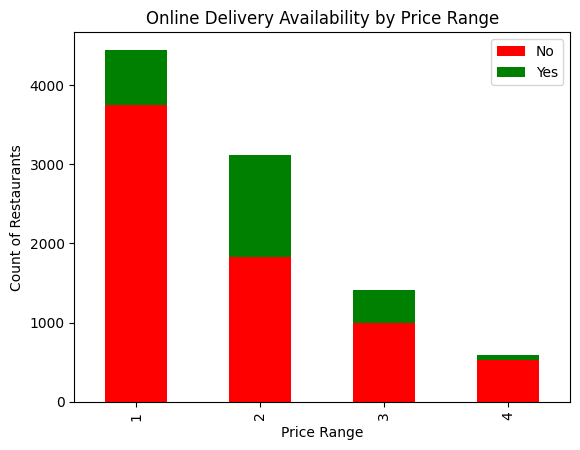

In [ ]:
online_delivery_count.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count of Restaurants')
plt.legend(labels=["No", "Yes"])
plt.show()

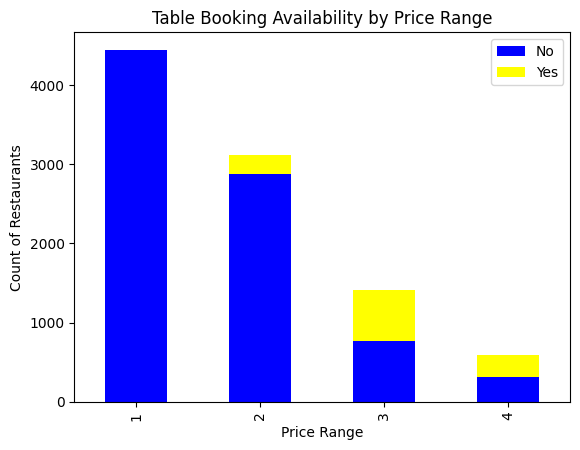

In [52]:
table_booking_count.plot(kind='bar', stacked=True, color=['blue', 'yellow'])
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count of Restaurants')
plt.legend(labels=["No", "Yes"])
plt.show()

## Task 3: Price Range vs Online Delivery and Table Booking

### Determine if higher-priced restaurants are more likely to offer these services.


In [64]:
## Here Price Range Divided into a 4 Category and we analyze the servises with price range into a percentage


online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print('Online delivery Availablity in percentage\n',online_delivery_percentage)

Online delivery Avilablity in percentage
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


In [65]:
table_booking_percentage = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100
print('Table booking availability in percentage\n', table_booking_percentage)

Table booking availability in percentage
 Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


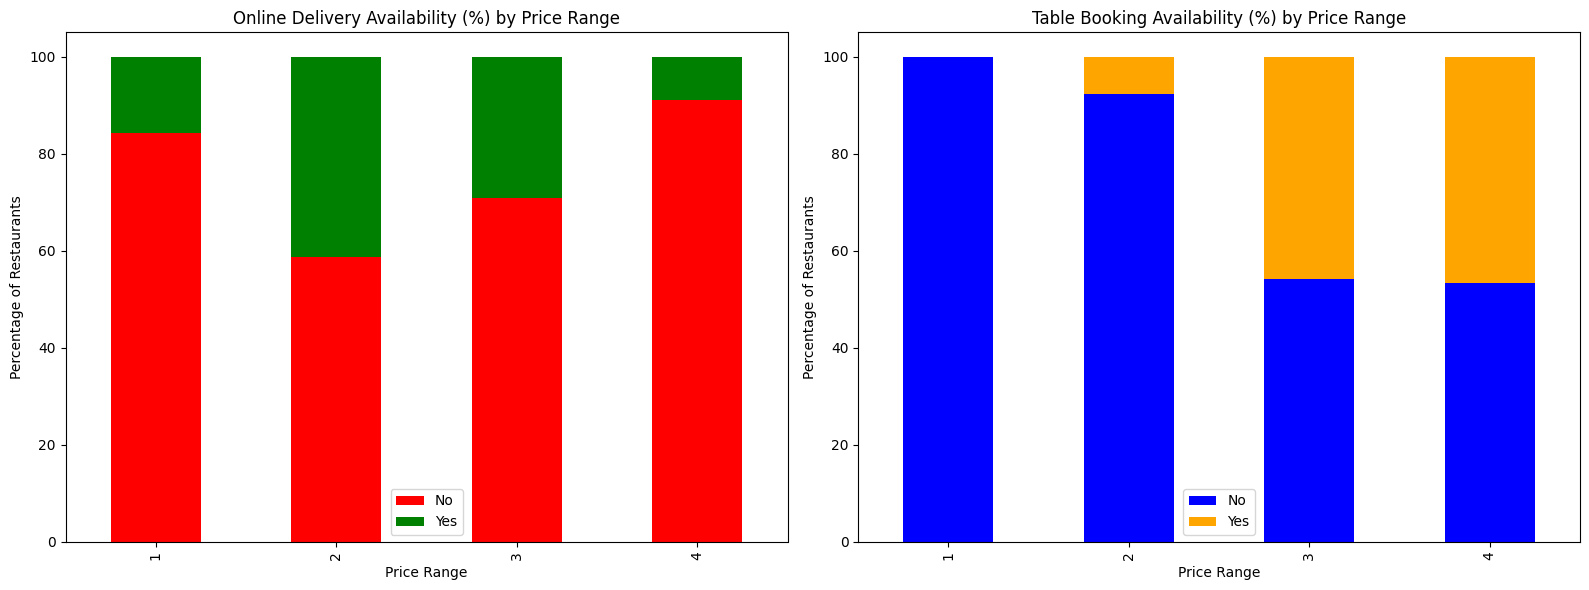

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
online_delivery_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[0])
axes[0].set_title('Online Delivery Availability (%) by Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Percentage of Restaurants')
axes[0].legend(labels=["No", "Yes"])
table_booking_percentage.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=axes[1])
axes[1].set_title('Table Booking Availability (%) by Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Percentage of Restaurants')
axes[1].legend(labels=["No", "Yes"])
plt.tight_layout()
plt.show()